# Excercise 2D MLP
Authors: Moro Palma Loris, Vedasri Nakka, Mirko Bristle, Alexandra Kovacs, Michael Brunner


Deadline: April 19, 2021 (end of day) With this exercise you should use your framework to apply an MLP approach to the Permuted MNIST dataset.
The goal of this exercise is to train an MLP with one hidden layer and experiment with diﬀerent parameters.


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import torchvision.transforms as transforms

import numpy as np
import math
import torchvision.datasets as datasets

%matplotlib inline


batch_size = 1000
width = 28
height = 28
channels = 1

transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.Resize(size=(height, width)), transforms.ToTensor()])


# List of images
trainfull_dataset = datasets.ImageFolder("./mnist-png-format-permutated/train/", transform)
test_set = datasets.ImageFolder("./mnist-png-format-permutated/test/", transform)

# Transforms

# Split  the training set into train and val. We will use val to tune hyperparameters
train_set, val_set = torch.utils.data.random_split(trainfull_dataset, [50000, 10000])

# data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

print("Train images: {},  Valiation images: {}, Test images: {}".\
      format(len(train_set), len(val_set), len(test_set)))


Train images: 50000,  Valiation images: 10000, Test images: 10000


In [2]:
class MLP(nn.Module):
    """ Single hidden layer MLP
    """
    def __init__(self, neurons):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(width*height*channels,neurons) #neurons 
        self.fc2 = nn.Linear(neurons, 10)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [3]:
def predict(net, dataloader, loss_fn):
    """ Function to find predictions on given test images.
    """

    predictions = []
    loss = []
    gt = []
    
    for it, (batch_images, batch_labels) in enumerate(dataloader):
        output = net(batch_images.view(batch_images.shape[0], -1))
        loss_ = loss_fn(output, batch_labels)
        predictions.extend(torch.argmax(output,1).numpy())
        loss.append(loss_.item())
        gt.extend(batch_labels.numpy())
        
    accu = accuracy(np.array(predictions), np.array(gt))
    return predictions, np.mean(loss), accu
    
def accuracy(pred_labels, true_labels):
    return np.mean(true_labels == pred_labels)

In [4]:
def training(neurons, trainloader, valloader,learning_rate, epochs):
    """ Function to train the MLP model.
    """
    correct = 0
    total = 0
    NO_EPOCHS = epochs
    enum_no_epochs = []
    acc_val = []
    acc_train = []
    acc_test = []
    loss_val = []
    loss_train = []
    loss_test = []
    

    # Initializes the MLP  with random weights
    net = MLP(neurons)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate) #learning rate 

    for epoch in range(NO_EPOCHS):  
        
        for i, (batch_images, batch_labels) in enumerate(trainloader):
            #print(torch.max(batch_images))
            optimizer.zero_grad()
            output = net(batch_images.view(batch_images.shape[0], -1))
            loss = loss_fn(output, batch_labels)
            loss.backward()
            optimizer.step()


        predictions_train, loss_train_, accuracy_train = predict(net, trainloader, loss_fn)
        acc_train.append(100*accuracy_train)
        loss_train.append(loss_train_)

        predictions_val, loss_val_,accuracy_val = predict(net, valloader, loss_fn)
        acc_val.append(100*accuracy_val)
        loss_val.append(loss_val_)


        if epoch%1==0:
            print("Epoch: {:4d}, Train Loss: {:.4f}, Val Loss: {:.4f}, Train Accuracy: {:.2f}%, Validation Accuracy: {:.2f}%"\
              .format(epoch, loss_train_, loss_val_,100*accuracy_train, 100*accuracy_val))

    plt.title('CE Loss plot during training stage for lr: {:.4f} and neurons: {}'.format(learning_rate, neurons))
    plt.plot( np.arange(NO_EPOCHS), loss_train, color = "m", linestyle = "--")
    plt.plot( np.arange(NO_EPOCHS), loss_val, color = "c", linestyle = "--")
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.title('Error rate plot during training stage for lr: {:.4f} and neurons: {}'.format(learning_rate, neurons))
    plt.plot( np.arange(NO_EPOCHS), 100-np.array(acc_train), color = "m", linestyle = "--")
    plt.plot( np.arange(NO_EPOCHS), 100-np.array(acc_val), color = "c", linestyle = "--")
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()    
    return (accuracy_val, net, 
            (loss_train, loss_val, 100-np.array(acc_train),100-np.array(acc_val)))
    


----------------------------------------------------------------------------------------
Training Setting as below: 
Num of runs: 1
Batch Size: 1000
No of epochs: 20
----------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.0010 and Hidden layer size: 10

Epoch:    0, Train Loss: 1.5803, Val Loss: 1.5790, Train Accuracy: 46.99%, Validation Accuracy: 46.83%
Epoch:    1, Train Loss: 0.9229, Val Loss: 0.9216, Train Accuracy: 79.84%, Validation Accuracy: 79.60%
Epoch:    2, Train Loss: 0.6286, Val Loss: 0.6268, Train Accuracy: 84.37%, Validation Accuracy: 84.18%
Epoch:    3, Train Loss: 0.5058, Val Loss: 0.5041, Train Accuracy: 86.93%, Validation Accuracy: 86.82%
Epoch:    4, Train Loss: 0.4377, Val Loss: 0.4361, Train Accuracy: 88.40%, Validation Accuracy: 88.36%
Epoch:    5, Train Loss: 0.3953, Val Loss: 0.3941, Train Accuracy: 89.33%

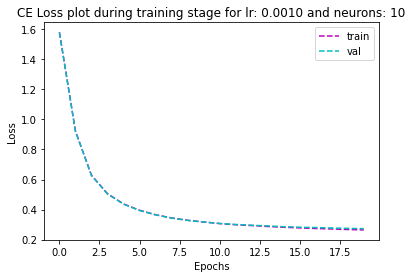

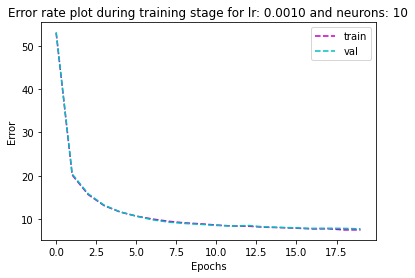

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.0010 and Hidden layer size: 40

Epoch:    0, Train Loss: 0.7804, Val Loss: 0.7755, Train Accuracy: 82.82%, Validation Accuracy: 82.72%
Epoch:    1, Train Loss: 0.4574, Val Loss: 0.4529, Train Accuracy: 88.40%, Validation Accuracy: 88.36%
Epoch:    2, Train Loss: 0.3660, Val Loss: 0.3633, Train Accuracy: 90.08%, Validation Accuracy: 89.93%
Epoch:    3, Train Loss: 0.3236, Val Loss: 0.3222, Train Accuracy: 91.06%, Validation Accuracy: 91.13%
Epoch:    4, Train Loss: 0.2965, Val Loss: 0.2977, Train Accuracy: 91.68%, Validation Accuracy: 91.70%
Epoch:    5, Train Loss: 0.2775, Val Loss: 0.2816, Train Accuracy: 92.27%, Validation Accuracy: 92.24%
Epoch:    6, Train Loss: 0.2621, Val Loss: 0.2690, Train Accuracy: 92.69%, Validation Accuracy: 92.38%
Epoch:    7, Train Loss: 0.2489, Val Loss: 0.2564, Train Accuracy: 93.08%, Validation Accuracy: 92.77%
Epoch:    8, Train Lo

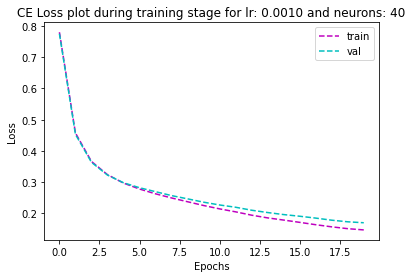

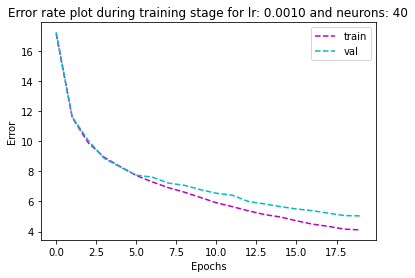

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.0010 and Hidden layer size: 70

Epoch:    0, Train Loss: 0.6081, Val Loss: 0.6050, Train Accuracy: 85.82%, Validation Accuracy: 85.68%
Epoch:    1, Train Loss: 0.3791, Val Loss: 0.3742, Train Accuracy: 89.84%, Validation Accuracy: 89.95%
Epoch:    2, Train Loss: 0.3158, Val Loss: 0.3141, Train Accuracy: 91.33%, Validation Accuracy: 91.42%
Epoch:    3, Train Loss: 0.2807, Val Loss: 0.2829, Train Accuracy: 92.22%, Validation Accuracy: 92.18%
Epoch:    4, Train Loss: 0.2574, Val Loss: 0.2639, Train Accuracy: 92.75%, Validation Accuracy: 92.48%
Epoch:    5, Train Loss: 0.2372, Val Loss: 0.2458, Train Accuracy: 93.35%, Validation Accuracy: 93.04%
Epoch:    6, Train Loss: 0.2196, Val Loss: 0.2304, Train Accuracy: 93.95%, Validation Accuracy: 93.58%
Epoch:    7, Train Loss: 0.2047, Val Loss: 0.2183, Train Accuracy: 94.34%, Validation Accuracy: 93.76%
Epoch:    8, Train Lo

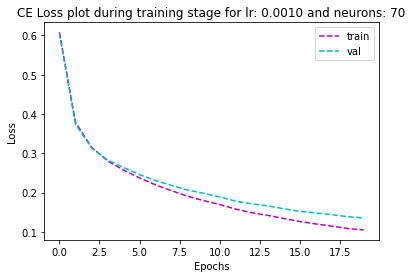

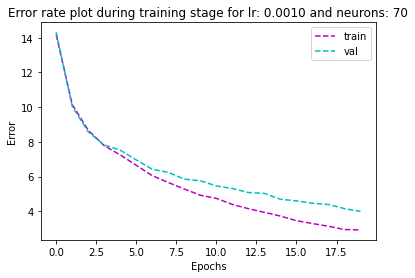

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.0010 and Hidden layer size: 100

Epoch:    0, Train Loss: 0.5153, Val Loss: 0.5105, Train Accuracy: 87.20%, Validation Accuracy: 87.38%
Epoch:    1, Train Loss: 0.3514, Val Loss: 0.3467, Train Accuracy: 90.29%, Validation Accuracy: 90.65%
Epoch:    2, Train Loss: 0.3007, Val Loss: 0.2999, Train Accuracy: 91.65%, Validation Accuracy: 91.82%
Epoch:    3, Train Loss: 0.2676, Val Loss: 0.2717, Train Accuracy: 92.58%, Validation Accuracy: 92.42%
Epoch:    4, Train Loss: 0.2431, Val Loss: 0.2498, Train Accuracy: 93.35%, Validation Accuracy: 93.17%
Epoch:    5, Train Loss: 0.2226, Val Loss: 0.2310, Train Accuracy: 93.85%, Validation Accuracy: 93.72%
Epoch:    6, Train Loss: 0.2029, Val Loss: 0.2150, Train Accuracy: 94.40%, Validation Accuracy: 93.95%
Epoch:    7, Train Loss: 0.1889, Val Loss: 0.2035, Train Accuracy: 94.71%, Validation Accuracy: 94.13%
Epoch:    8, Train L

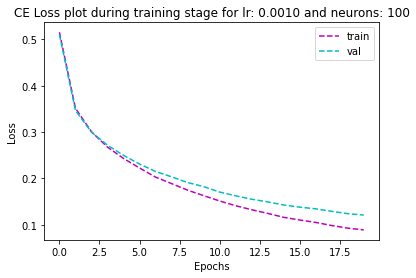

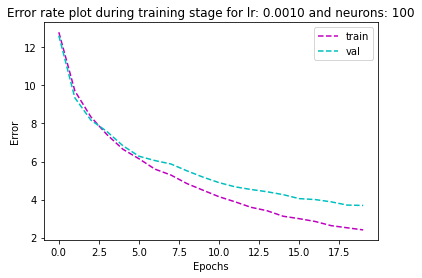

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.0100 and Hidden layer size: 10

Epoch:    0, Train Loss: 0.3630, Val Loss: 0.3548, Train Accuracy: 89.60%, Validation Accuracy: 89.85%
Epoch:    1, Train Loss: 0.2935, Val Loss: 0.2948, Train Accuracy: 91.64%, Validation Accuracy: 91.55%
Epoch:    2, Train Loss: 0.2710, Val Loss: 0.2783, Train Accuracy: 92.27%, Validation Accuracy: 91.89%
Epoch:    3, Train Loss: 0.2613, Val Loss: 0.2747, Train Accuracy: 92.57%, Validation Accuracy: 91.95%
Epoch:    4, Train Loss: 0.2528, Val Loss: 0.2676, Train Accuracy: 92.71%, Validation Accuracy: 92.23%
Epoch:    5, Train Loss: 0.2363, Val Loss: 0.2563, Train Accuracy: 93.28%, Validation Accuracy: 92.74%
Epoch:    6, Train Loss: 0.2313, Val Loss: 0.2537, Train Accuracy: 93.53%, Validation Accuracy: 92.62%
Epoch:    7, Train Loss: 0.2276, Val Loss: 0.2518, Train Accuracy: 93.47%, Validation Accuracy: 92.68%
Epoch:    8, Train Lo

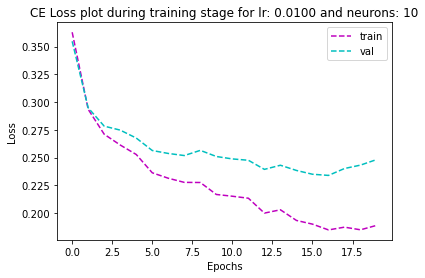

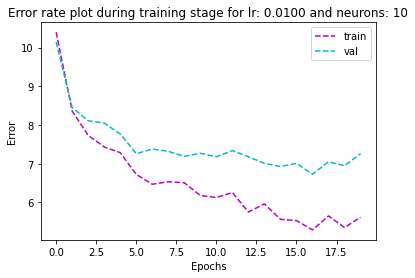

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.0100 and Hidden layer size: 40

Epoch:    0, Train Loss: 0.2953, Val Loss: 0.2992, Train Accuracy: 91.63%, Validation Accuracy: 91.49%
Epoch:    1, Train Loss: 0.2316, Val Loss: 0.2448, Train Accuracy: 93.30%, Validation Accuracy: 92.98%
Epoch:    2, Train Loss: 0.1795, Val Loss: 0.1995, Train Accuracy: 94.99%, Validation Accuracy: 94.17%
Epoch:    3, Train Loss: 0.1493, Val Loss: 0.1748, Train Accuracy: 95.71%, Validation Accuracy: 94.70%
Epoch:    4, Train Loss: 0.1255, Val Loss: 0.1560, Train Accuracy: 96.35%, Validation Accuracy: 95.35%
Epoch:    5, Train Loss: 0.1043, Val Loss: 0.1384, Train Accuracy: 96.94%, Validation Accuracy: 95.76%
Epoch:    6, Train Loss: 0.0993, Val Loss: 0.1426, Train Accuracy: 97.09%, Validation Accuracy: 95.73%
Epoch:    7, Train Loss: 0.0778, Val Loss: 0.1236, Train Accuracy: 97.70%, Validation Accuracy: 96.22%
Epoch:    8, Train Lo

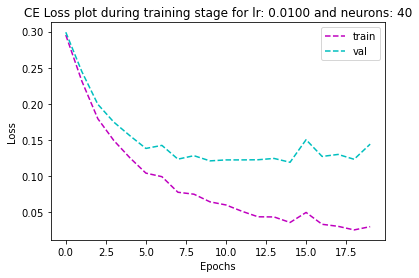

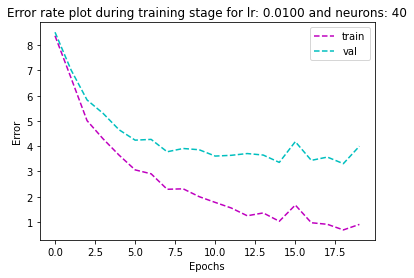

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.0100 and Hidden layer size: 70

Epoch:    0, Train Loss: 0.2573, Val Loss: 0.2674, Train Accuracy: 92.50%, Validation Accuracy: 92.15%
Epoch:    1, Train Loss: 0.1752, Val Loss: 0.1943, Train Accuracy: 95.03%, Validation Accuracy: 94.21%
Epoch:    2, Train Loss: 0.1334, Val Loss: 0.1568, Train Accuracy: 96.11%, Validation Accuracy: 95.14%
Epoch:    3, Train Loss: 0.1085, Val Loss: 0.1395, Train Accuracy: 96.79%, Validation Accuracy: 95.86%
Epoch:    4, Train Loss: 0.0842, Val Loss: 0.1221, Train Accuracy: 97.53%, Validation Accuracy: 96.40%
Epoch:    5, Train Loss: 0.0657, Val Loss: 0.1107, Train Accuracy: 98.04%, Validation Accuracy: 96.64%
Epoch:    6, Train Loss: 0.0608, Val Loss: 0.1124, Train Accuracy: 98.21%, Validation Accuracy: 96.47%
Epoch:    7, Train Loss: 0.0513, Val Loss: 0.1006, Train Accuracy: 98.52%, Validation Accuracy: 97.01%
Epoch:    8, Train Lo

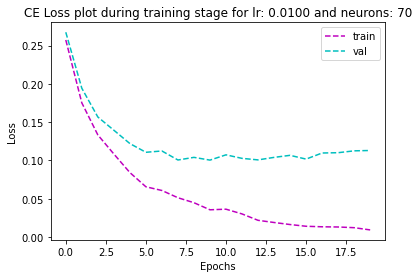

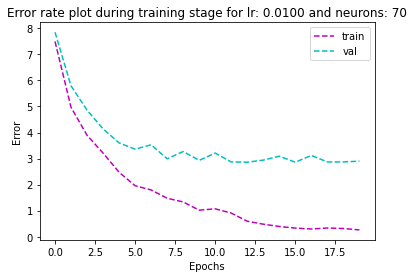

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.0100 and Hidden layer size: 100

Epoch:    0, Train Loss: 0.2234, Val Loss: 0.2315, Train Accuracy: 93.71%, Validation Accuracy: 93.38%
Epoch:    1, Train Loss: 0.1587, Val Loss: 0.1756, Train Accuracy: 95.44%, Validation Accuracy: 94.91%
Epoch:    2, Train Loss: 0.1100, Val Loss: 0.1386, Train Accuracy: 96.89%, Validation Accuracy: 95.72%
Epoch:    3, Train Loss: 0.0879, Val Loss: 0.1221, Train Accuracy: 97.47%, Validation Accuracy: 96.16%
Epoch:    4, Train Loss: 0.0706, Val Loss: 0.1145, Train Accuracy: 97.89%, Validation Accuracy: 96.43%
Epoch:    5, Train Loss: 0.0620, Val Loss: 0.1132, Train Accuracy: 98.14%, Validation Accuracy: 96.43%
Epoch:    6, Train Loss: 0.0557, Val Loss: 0.1167, Train Accuracy: 98.27%, Validation Accuracy: 96.74%
Epoch:    7, Train Loss: 0.0387, Val Loss: 0.0992, Train Accuracy: 98.88%, Validation Accuracy: 97.00%
Epoch:    8, Train L

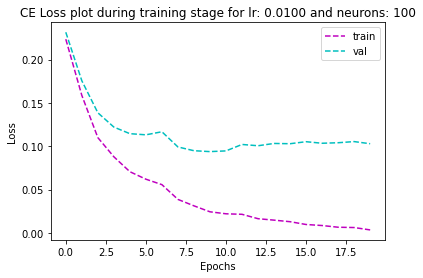

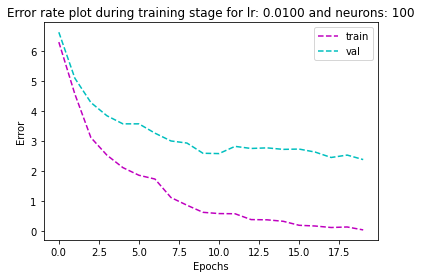

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.1000 and Hidden layer size: 10

Epoch:    0, Train Loss: 0.6954, Val Loss: 0.7084, Train Accuracy: 76.70%, Validation Accuracy: 76.42%
Epoch:    1, Train Loss: 0.4739, Val Loss: 0.4939, Train Accuracy: 86.62%, Validation Accuracy: 86.19%
Epoch:    2, Train Loss: 0.4202, Val Loss: 0.4444, Train Accuracy: 87.97%, Validation Accuracy: 87.11%
Epoch:    3, Train Loss: 0.4217, Val Loss: 0.4574, Train Accuracy: 87.85%, Validation Accuracy: 87.02%
Epoch:    4, Train Loss: 0.3964, Val Loss: 0.4389, Train Accuracy: 88.40%, Validation Accuracy: 87.16%
Epoch:    5, Train Loss: 0.3763, Val Loss: 0.4272, Train Accuracy: 89.32%, Validation Accuracy: 87.85%
Epoch:    6, Train Loss: 0.3879, Val Loss: 0.4376, Train Accuracy: 89.10%, Validation Accuracy: 87.92%
Epoch:    7, Train Loss: 0.3710, Val Loss: 0.4256, Train Accuracy: 89.42%, Validation Accuracy: 88.38%
Epoch:    8, Train Lo

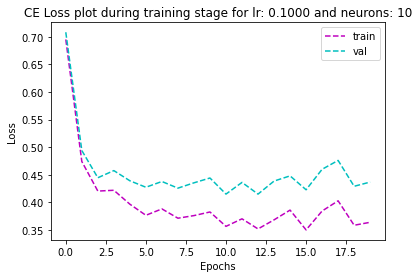

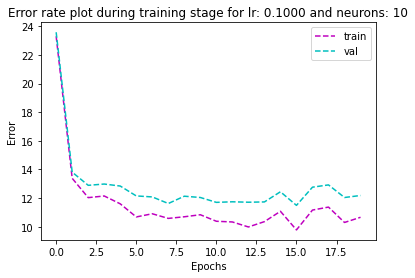

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.1000 and Hidden layer size: 40

Epoch:    0, Train Loss: 0.4156, Val Loss: 0.4237, Train Accuracy: 87.87%, Validation Accuracy: 87.58%
Epoch:    1, Train Loss: 0.2846, Val Loss: 0.3131, Train Accuracy: 92.07%, Validation Accuracy: 91.28%
Epoch:    2, Train Loss: 0.2384, Val Loss: 0.2751, Train Accuracy: 93.39%, Validation Accuracy: 92.74%
Epoch:    3, Train Loss: 0.2172, Val Loss: 0.2642, Train Accuracy: 93.92%, Validation Accuracy: 92.95%
Epoch:    4, Train Loss: 0.1957, Val Loss: 0.2534, Train Accuracy: 94.41%, Validation Accuracy: 93.21%
Epoch:    5, Train Loss: 0.1751, Val Loss: 0.2376, Train Accuracy: 94.87%, Validation Accuracy: 93.56%
Epoch:    6, Train Loss: 0.1709, Val Loss: 0.2573, Train Accuracy: 95.08%, Validation Accuracy: 93.17%
Epoch:    7, Train Loss: 0.1899, Val Loss: 0.2616, Train Accuracy: 94.56%, Validation Accuracy: 93.18%
Epoch:    8, Train Lo

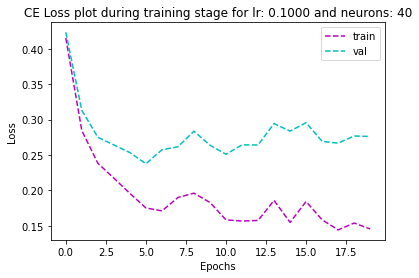

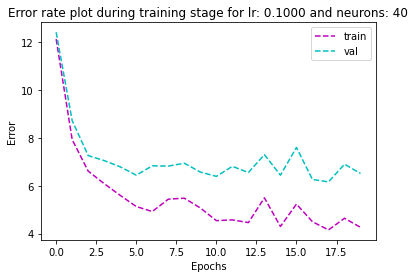

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.1000 and Hidden layer size: 70

Epoch:    0, Train Loss: 0.4683, Val Loss: 0.4853, Train Accuracy: 87.12%, Validation Accuracy: 86.98%
Epoch:    1, Train Loss: 0.2775, Val Loss: 0.2975, Train Accuracy: 92.29%, Validation Accuracy: 91.90%
Epoch:    2, Train Loss: 0.2275, Val Loss: 0.2578, Train Accuracy: 93.35%, Validation Accuracy: 92.80%
Epoch:    3, Train Loss: 0.2019, Val Loss: 0.2427, Train Accuracy: 94.06%, Validation Accuracy: 92.91%
Epoch:    4, Train Loss: 0.1848, Val Loss: 0.2337, Train Accuracy: 94.57%, Validation Accuracy: 93.53%
Epoch:    5, Train Loss: 0.1792, Val Loss: 0.2444, Train Accuracy: 94.94%, Validation Accuracy: 93.75%
Epoch:    6, Train Loss: 0.1823, Val Loss: 0.2446, Train Accuracy: 94.59%, Validation Accuracy: 93.24%
Epoch:    7, Train Loss: 0.1764, Val Loss: 0.2398, Train Accuracy: 94.95%, Validation Accuracy: 93.75%
Epoch:    8, Train Lo

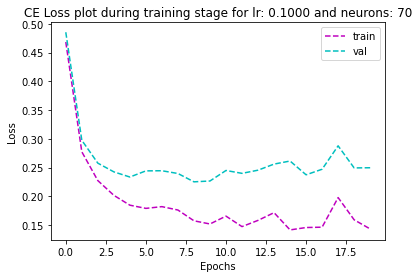

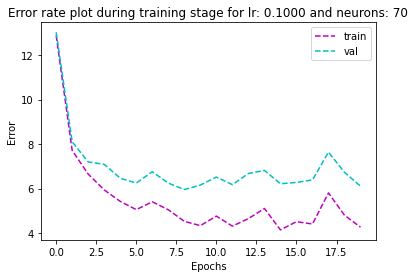

----------------------------------------------------------------------------------------
Running Experiment 1/1 with LR: 0.1000 and Hidden layer size: 100

Epoch:    0, Train Loss: 0.6643, Val Loss: 0.6736, Train Accuracy: 77.99%, Validation Accuracy: 77.49%
Epoch:    1, Train Loss: 0.4228, Val Loss: 0.4467, Train Accuracy: 87.36%, Validation Accuracy: 86.93%
Epoch:    2, Train Loss: 0.3559, Val Loss: 0.3848, Train Accuracy: 89.53%, Validation Accuracy: 89.20%
Epoch:    3, Train Loss: 0.3159, Val Loss: 0.3568, Train Accuracy: 90.71%, Validation Accuracy: 89.41%
Epoch:    4, Train Loss: 0.2956, Val Loss: 0.3453, Train Accuracy: 91.43%, Validation Accuracy: 90.04%
Epoch:    5, Train Loss: 0.2595, Val Loss: 0.3265, Train Accuracy: 92.63%, Validation Accuracy: 91.50%
Epoch:    6, Train Loss: 0.2615, Val Loss: 0.3279, Train Accuracy: 92.33%, Validation Accuracy: 90.69%
Epoch:    7, Train Loss: 0.2414, Val Loss: 0.3264, Train Accuracy: 93.19%, Validation Accuracy: 91.37%
Epoch:    8, Train L

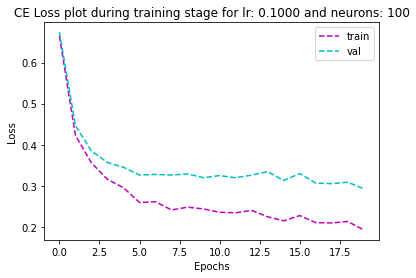

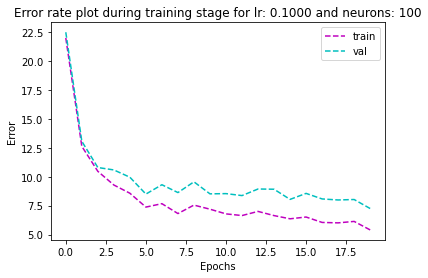

--------------------------------------------------------------------

Best Neuron size: 100, Best LR: 0.0100 with best Val Accuracy:97.62%

--------------------------------------------------------------------


In [5]:
batch_size  = 1000 
num_epochs = 20  # Total number of epochs  
num_runs = 5 # To peform random initialization for each setting
lr_rates = [0.001, 0.01, 0.1] # possible learning rates
neurons = range(10, 110, 30) # possible hidden layer sizes with step size 30

print("----------------------------------------------------------------------------------------")
print("Training Setting as below: ")
print("Num of runs: {}".format(num_runs))
print("Batch Size: {}".format(batch_size))
print("No of epochs: {}".format(num_epochs))
print("----------------------------------------------------------------------------------------\n\n")


num_exp = 0
best_val_acc = 0.00


# Main loop to find the optimal configuration
for lr in lr_rates:
    for neuron in neurons:
        for run in range(num_runs):
            print("----------------------------------------------------------------------------------------")
            print("Running Experiment {}/{} with LR: {:.4f} and Hidden layer size: {}\n"\
                  .format(run+1, num_runs, lr, neuron))
            val_acc, trained_net, *loss_curves = training(neuron, train_loader, val_loader, \
                                                                    lr, num_epochs)
            num_exp +=1
                        
            # pick the model withh best accuracy on validation data
            if best_val_acc < val_acc:
                best_neuron = neuron
                best_lr = lr
                best_val_acc = val_acc
                best_loss_curves = loss_curves
                # save  the best model to disk
                torch.save( trained_net, "best_net.pth")


# Print the optimal configuration
print("--------------------------------------------------------------------\n")
print("Best Neuron size: {}, Best LR: {:.4f} with best Val Accuracy:{:.2f}%\n"\
      .format(best_neuron, best_lr, 100*best_val_acc))
print("--------------------------------------------------------------------")

        

In [6]:
# Print the optimal configuration again!

print("-------------------------------------------------------------------------------\n")
print("Optimal Neuron size: {}, Optimal LR: {:.4f} with highest Val Accuracy: {:.2f}%\n"\
      .format(best_neuron, best_lr, 100*best_val_acc))
print("---------------------------------------------------------------------------------")

-------------------------------------------------------------------------------

Optimal Neuron size: 100, Optimal LR: 0.0100 with highest Val Accuracy: 97.62%

---------------------------------------------------------------------------------


In [7]:
# Load the optimal model 
net = torch.load('./best_net.pth')
loss_fn = nn.CrossEntropyLoss()
predictions_test, loss_test_, accuracy_test = predict(net, test_loader, loss_fn)

print("------------------------------------------------------------------------------------\n")
print("\nFinal Test accuracy for optimal Network with hidden layer of {} neurons and LR: {:.4f} is {:.2f}%\n\n"\
      .format(best_neuron, best_lr, accuracy_test*100))
print("----------------------------------------------------------------------------------------")


------------------------------------------------------------------------------------


Final Test accuracy for optimal Network with hidden layer of 100 neurons and LR: 0.0100 is 97.76%


----------------------------------------------------------------------------------------


## Final Submissions ##


### 1. Access to your GitHub so that we can inspect your code

- We will present the results in the final report along with other questions.   


### 2. Plot showing the accuracy and loss on the training and the validation set with respect to the training epochs. ###

- We run the MLP network for 20 epochs with Adam optimizer using possible hyperparameters  as below:

    a. Learning rates  :  [0.001, 0.01, 0.1] 

    b. Number of neurons in hidden layers: [10, 40, 70, 100]

    c. Different initializations: 1 time


   #### Basing on running all possible configurations, we found the  accuracy of 97.76% on test data with lr=0.0100 and neurons=100. The hyperparameters were selected using validation.

We present the plot for this setting on both training and validations set below.



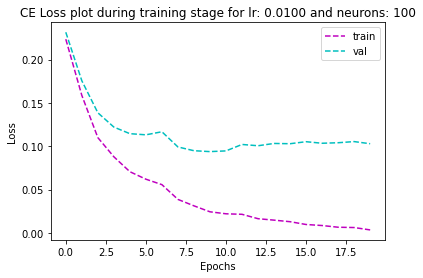

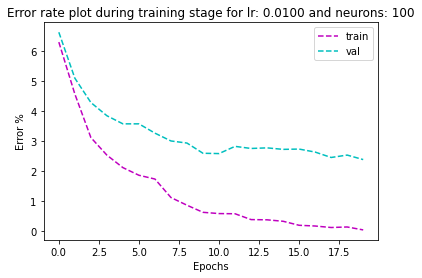

In [8]:

plt.title('CE Loss plot during training stage for lr: {:.4f} and neurons: {}'.format(best_lr, best_neuron))
plt.plot( np.arange(num_epochs), best_loss_curves[0][0], color = "m", linestyle = "--")
plt.plot( np.arange(num_epochs), best_loss_curves[0][1], color = "c", linestyle = "--")
plt.legend(['train', 'val'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.title('Error rate plot during training stage for lr: {:.4f} and neurons: {}'.format(best_lr, best_neuron))
plt.plot( np.arange(num_epochs), best_loss_curves[0][2], color = "m", linestyle = "--")
plt.plot( np.arange(num_epochs), best_loss_curves[0][3], color = "c", linestyle = "--")
plt.legend(['train', 'val'])
plt.xlabel('Epochs')
plt.ylabel('Error %')
plt.show()

    

We observe from above plots, the error rate decreases with epochs.

### 3. Permutated MNIST vs Original MNIST ###
The final test accuracy for both datasets are showing favorable numbers:
<ul>
    <li>Original MNIST: accuracy of 97.77% with learning rate of 0.001 and 100 neurons (ran with 100 epochs)</li>
    <li>Permutated MNIST: accuracy of 97.76% with learning rate of 0.01 and 100 neurons (ran with 20 epochs)</li>
</ul>

There is no substantial difference between the graphs. Even though the numbers of epochs differs, the graphs are the same.
If we would have ran the same number of epochs with the permutated dataset, the graphs would look similar with each other.

In conclusion, there is no considerable difference between the experiment done with the original MNIST dataset and the
experiment executed with the permutated MNIST dataset. We incline to say they might be almost equally close.
    
The original MNIST dataset contains readable, easy to recognize digits. On the other hand the permutated set is not
very interpretable for the human eye. Nevertheless, the permutated set holds the same information as the non-permutated.
As the MLP and the CNN are not restricted on the geometrical structure, the networks are able to seperate the images
almost equally well as the non-permutated set. 